<a href="https://colab.research.google.com/github/YRYoung/HPC/blob/main/Assigenment/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

* Write a Python function that takes *N* as an input and returns the matrix *A* and vector *f*.
* You should use an appropriate sparse storage format for the matrix *A*.

In [90]:
import numpy as np
from scipy.sparse import csr_matrix


def generate_mat(N):
    assert N >= 0
    if N == 0: return np.array([1]), np.array([1])

    f = np.concatenate([np.zeros(N), [1]], axis=0)

    A = np.zeros([N + 1, N + 1])
    for i in range(1, N):
        A[i, i - 1:i + 2] = [-1, 2. - (29 * 29 * np.pi * np.pi / 4 / N / N), -1]
    A[0, 0] = 1
    A[N, N] = 1

    f = csr_matrix(f)
    A = csr_matrix(A)
    # A = csc_matrix(A)

    return A, f


A, f = generate_mat(8)
print(A, '\n\n', f)

[[  1.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [ -1.         -30.42319258  -1.           0.           0.
    0.           0.           0.           0.        ]
 [  0.          -1.         -30.42319258  -1.           0.
    0.           0.           0.           0.        ]
 [  0.           0.          -1.         -30.42319258  -1.
    0.           0.           0.           0.        ]
 [  0.           0.           0.          -1.         -30.42319258
   -1.           0.           0.           0.        ]
 [  0.           0.           0.           0.          -1.
  -30.42319258  -1.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   -1.         -30.42319258  -1.           0.        ]
 [  0.           0.           0.           0.           0.
    0.          -1.         -30.42319258  -1.        ]
 [  0.           0.           0.           0.           0.
    0.           0.  

* compute the approximate solution for your problem for *N=10*, *N=100*, and *N=10*.
* Plot the solutions for these three values of *N*.



[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


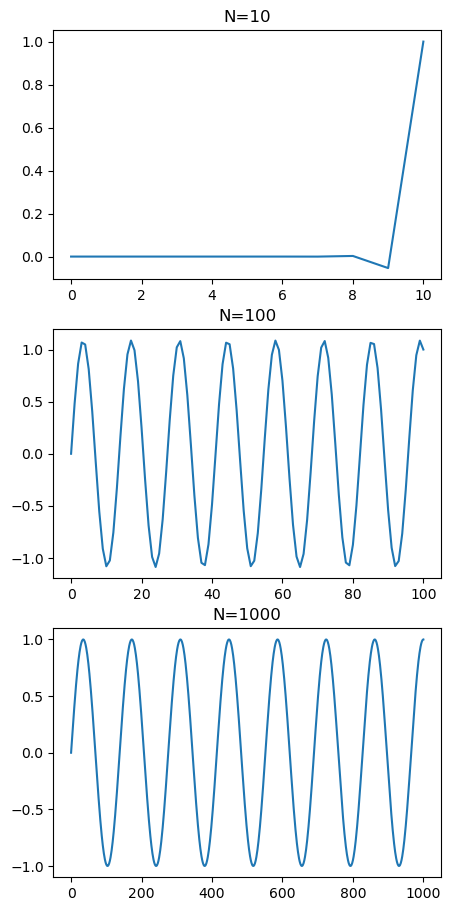

In [4]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

i = 0
fig, ax = plt.subplots(3, 1, figsize=(5, 11))
print(ax)

for N in [10, 100, 1000]:
    A, f = generate_mat(N)
    u = spsolve(A, f.T)

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x, u)
    ax[i].set_title('N=' + str(N))
    i = i + 1

plt.show()

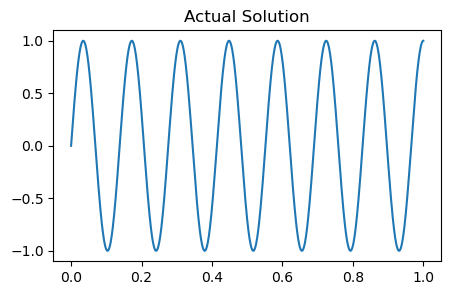

In [92]:
k = 29. * np.pi / 2.
x = np.linspace(0, 1, 1000)

u = np.sin(k * x)
plt.figure(figsize=(5, 3))
plt.plot(x, u)
plt.title('Actual Solution')
plt.show()

* Briefly (1-2 sentences) comment on your plots:

  + __How different__ are they to each other? 

  + Which do you expect to be **closest** to the actual solution of the wave problem?





Closest: N=1000

* Compute this error for a range of values for  of your choice, on axes that use log scales
* plot *N* against the error in your solution.

100%|██████████| 40/40 [00:04<00:00,  9.68it/s]


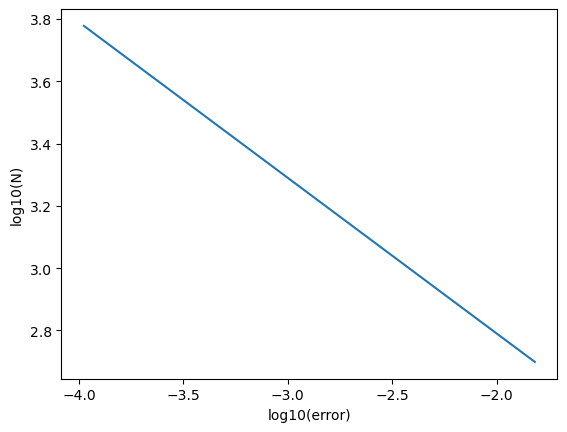

[ 500.  641.  782.  923. 1064. 1205. 1346. 1487. 1628. 1769. 1910. 2051.
 2192. 2333. 2474. 2615. 2756. 2897. 3038. 3179. 3321. 3462. 3603. 3744.
 3885. 4026. 4167. 4308. 4449. 4590. 4731. 4872. 5013. 5154. 5295. 5436.
 5577. 5718. 5859. 6000.] 
 [0.015230800983150532, 0.00926208812486675, 0.006220711463573377, 0.004465445725117041, 0.0033605796681698656, 0.002620061812831847, 0.0020997379737517103, 0.0017202634738233118, 0.0014352482033692937, 0.0012155982400537113, 0.001042737886079101, 0.0009042700855070585, 0.0007916483301855376, 0.000698871643965978, 0.0006214864213944203, 0.000556269336676813, 0.0005007982877828152, 0.0004532303440080328, 0.0004121424578045797, 0.00037639486725252885, 0.0003448938000723441, 0.0003173689935081943, 0.00029301318618465966, 0.00027136167030054545, 0.0002520225169884843, 0.00023467804419517388, 0.00021906326852074928, 0.00020495797221134135, 0.00019217379231679585, 0.0001805485833877192, 0.00016994651047461812, 0.0001602510382327331, 0.000151363401087

In [28]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 29. * np.pi / 2.
error = []
sizes = np.round(np.linspace(500, 6000, 40))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))
    u = spsolve(A, f.T)
    u_exact = np.sin(k * x)  #!!
    error.append(np.max(np.abs(u - u_exact)))

plt.plot(np.log10(error), np.log10(sizes))
plt.xlabel('log10(error)')
plt.ylabel('log10(N)')
ax = plt.gca()
plt.show()

print(sizes, '\n', error)

* For the same values of *N*, measure the time taken to compute your approximations for both functions.
* On axes that both use log scales, plot *N* against the time taken to compute a solution.

100%|██████████| 40/40 [00:08<00:00,  4.98it/s]


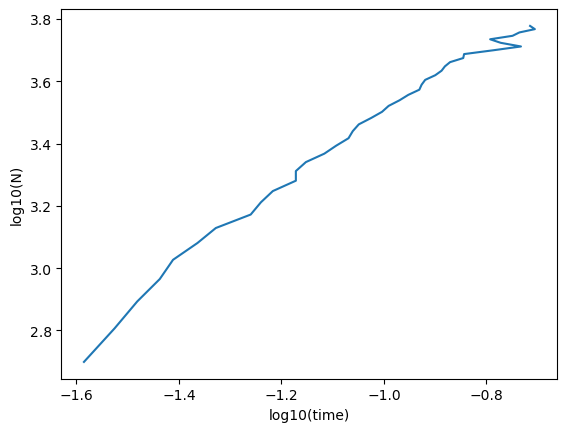

In [27]:

import matplotlib.pyplot as plt
from tqdm import tqdm
import timeit

k = 29. * np.pi / 2.
times = []
sizes = np.round(np.linspace(500, 6000, 40))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))

    t = timeit.Timer(lambda: spsolve(A, f.T)).timeit(110)

    times.append(t)

plt.plot(np.log10(times), np.log10(sizes))

plt.xlabel('log10(time)')
plt.ylabel('log10(N)')
plt.show()

* pick a value of that you would expect to give error of or 10<sup>-8</sup> less.
* Briefly (1-2 sentences) explain how you picked your value of *N*
* predict how long the computation will take

In [81]:
from sympy import symbols, solve
import math

log_time = np.log10(times)
log_error = np.log10(error)
log_size = np.log10(sizes)

f1 = np.polyfit(log_error, log_size, 1)
print('Fit function of log_error & log_size:', np.poly1d(f1))

x = symbols('x')
a = solve(f1[0] * x + f1[1] < -8)
print('\nInequation:\n', a)
result_logN = a.args[0].args[0]
result_N = math.ceil(math.pow(10., result_logN))
print('\nExpected minimum value of N that satisfies the given condition:\n', result_N)

f2 = np.polyfit(log_size, log_time, 1)
print('\nFit function of log_size & log_time:', np.poly1d(f2))

x_time = math.pow(10., f2[0] * result_logN + f2[1])
print('\nExpected computation time:\n{:.0f}'.format(x_time))

fit function of log_error & log_size:  
-0.5 x + 1.79

Inequation:
 (19.5823387933507 < x) & (x < oo)

Expected minimum value of N that satisfies the given condition:
 38224234201155559424

fit function of log_size & log_time:  
0.8427 x - 3.938

Expected computation time:
3667295443486


# Part2

* Implement this iterative scheme in Python.
    * You should implement this as a function that takes as an input.

In [9]:
import numpy as np

param = 1000


def generate_tem_mat(N):
    nelements = ((N - 1) ** 2 + N - 1) * 4 + (N + 1) * 3 - 2
    row_ind = np.zeros(nelements, dtype=np.float64)
    col_ind = np.zeros(nelements, dtype=np.float64)
    data = np.zeros(nelements, dtype=np.float64)

    f = np.zeros((N + 1) ** 2, dtype=np.float64)
    n = 0
    for i in range(N + 1):
        for j in range(N + 1):
            location = j * (N + 1) + i

            if i == 0 or i == N or j == 0:
                row_ind[n] = col_ind[n] = location
                data[n] = 1
                f[location] = 10 if i == 0 or i == N else 0
                n += 1
            else:
                row_ind[n:n + 4] = location
                col_ind[n:n + 4] = [location - (N + 2),
                                    location - (N + 1),
                                    location - N,
                                    location]
                data[n:n + 4] = [-N / param,
                                 -1 + N / (param / 2),
                                 -N / param,
                                 1]
                f[location] = 0
                n += 4

    return coo_matrix((data, (row_ind, col_ind)), shape=((N + 1) ** 2, (N + 1) ** 2)).tocsr(), f

In [10]:
 A, f = generate_tem_mat(22)
print(A)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0
  (10, 10)	1.0
  (11, 11)	1.0
  (12, 12)	1.0
  (13, 13)	1.0
  (14, 14)	1.0
  (15, 15)	1.0
  (16, 16)	1.0
  (17, 17)	1.0
  (18, 18)	1.0
  (19, 19)	1.0
  (20, 20)	1.0
  (21, 21)	1.0
  (22, 22)	1.0
  (23, 23)	1.0
  (24, 0)	-0.022
  :	:
  (522, 498)	-0.022
  (522, 499)	-0.956
  (522, 500)	-0.022
  (522, 522)	1.0
  (523, 499)	-0.022
  (523, 500)	-0.956
  (523, 501)	-0.022
  (523, 523)	1.0
  (524, 500)	-0.022
  (524, 501)	-0.956
  (524, 502)	-0.022
  (524, 524)	1.0
  (525, 501)	-0.022
  (525, 502)	-0.956
  (525, 503)	-0.022
  (525, 525)	1.0
  (526, 502)	-0.022
  (526, 503)	-0.956
  (526, 504)	-0.022
  (526, 526)	1.0
  (527, 503)	-0.022
  (527, 504)	-0.956
  (527, 505)	-0.022
  (527, 527)	1.0
  (528, 528)	1.0


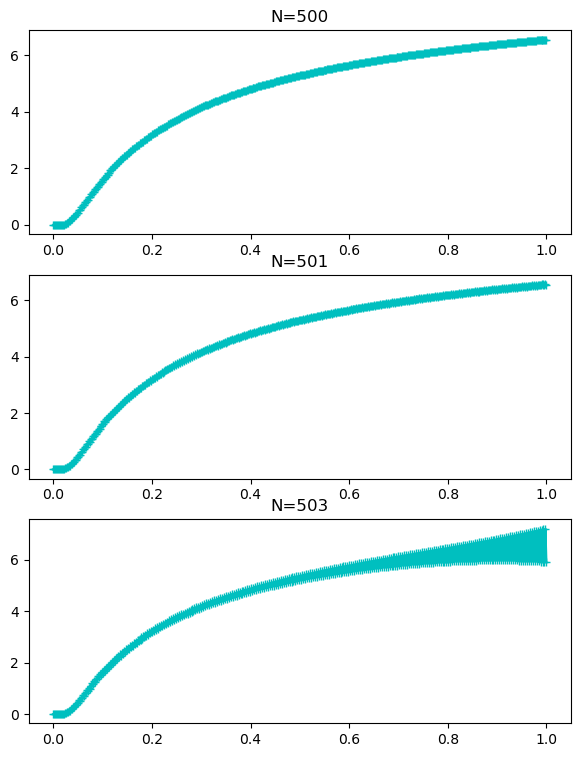

In [11]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

t = 10

Ns = [500, 501, 503]
fig, ax = plt.subplots(len(Ns), 1, figsize=(7, len(Ns) * 3))
for i, N in enumerate(Ns):
    A, f = generate_tem_mat(N)
    u = spsolve(A, f).reshape((N + 1, N + 1))

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x / N, u[:, t], 'c+-')
    # ax[i].plot(x, u[t - 1:len(u):N + 1])
    ax[i].set_title('N=' + str(N))

plt.show()

C:\Users\Shift\AppData\Local\Temp\ipykernel_6612\3514296099.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


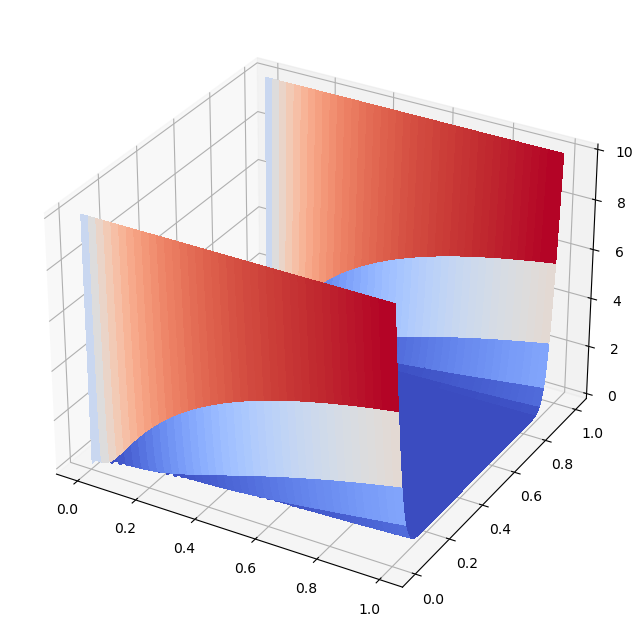

In [13]:
% matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm

from scipy.sparse.linalg import spsolve

N = 200

A, f = generate_tem_mat(N)
sol = spsolve(A, f)

u = sol.reshape((N + 1, N + 1)).T

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ticks = np.linspace(0, 1, N + 1)
X, Y = np.meshgrid(ticks, ticks)
surf = ax.plot_surface(X, Y, u, antialiased=False, cmap=cm.coolwarm)
plt.show()

* plot the temperature of the rod at *t=1, t=2* and *t=10* .

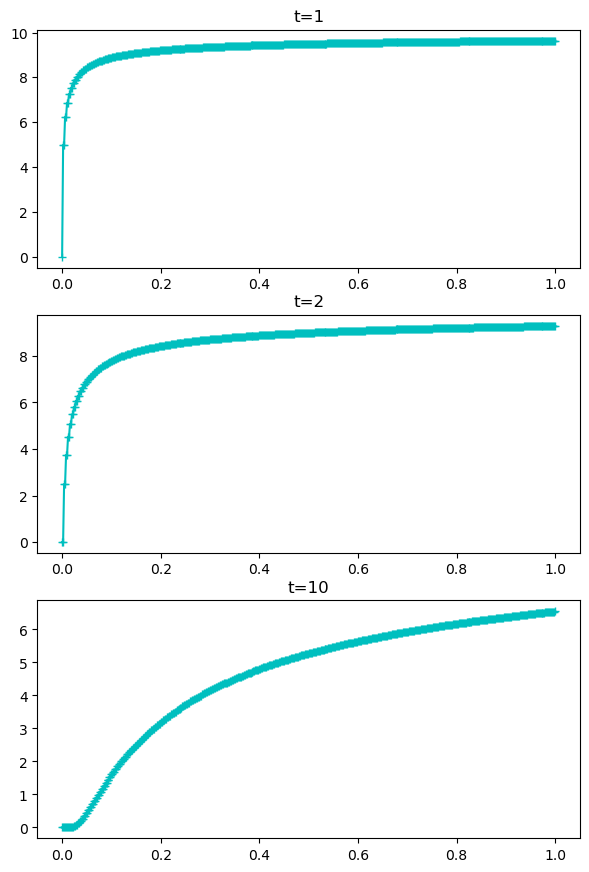

In [15]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

Ts = [1, 2, 10]
N = 500

fig, ax = plt.subplots(len(Ts), 1, figsize=(7, len(Ts) * 3.5))
for i, t in enumerate(Ts):
    A, f = generate_tem_mat(N)
    u = spsolve(A, f).reshape((N + 1, N + 1))

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x / N, u[:, t], 'c+-')
    # ax[i].plot(x, u[t - 1:len(u):N + 1])
    ax[i].set_title('t=' + str(t))

plt.show()

* Briefly (1-2 sentences) comment on how you picked a value for *N*.

* Use numba.cuda to parallelize your implementation on a GPU
    * think carefully about when data needs to be copied, and be careful not to copy data to/from the GPU when not needed.

In [10]:
from numba import cuda
import numba
import numpy as np
from scipy.sparse import coo_matrix
import math

param = 1000
N=100
t_per_block = 20  # <=32
block_per_grid = int(math.ceil((N + 1) / t_per_block))
nelements = ((N - 1) ** 2 + N - 1) * 4 + (N + 1) * 3 - 2

@cuda.jit
def generate_tem_mat_cuda(N, row_col, data, f):
    total=t_per_block *t_per_block
    local_row_col = cuda.shared.array(tuple(2,total), numba.int64)
    local_data = cuda.shared.array((1, total), numba.float32)
    local_count = cuda.shared.array(1, numba.uint16)

    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y
    px, py = cuda.grid()
    if px > N or py > N: return

    cuda.syncthreads()

    # location = numba.int32(py * (N + 1) + px)
    # if px == 0 or px == N or py == 0:
    #     local_row_col[:, local_count] = [location, location]
    #     local_data[location] = 1.
    #
    #     f[location] = 10 if i == 0 or i == N else 0
    #     local_count += 1
    #
    # else:
    #     local_row_col[:, local_count:local_count + 4] = [
    #         [location, location, location, location],
    #         [location - (N + 2), location - (N + 1), location - N, location]]
    #     local_data[:, local_count:local_count + 4] = [-N / param,
    #                                                   -1 + N / (param / 2),
    #                                                   -N / param,
    #                                                   1.]
    #
    #     f[location] = 0
    #     local_count += 4
    #
    # cuda.syncthreads()
    #
    # local_row_col = local_row_col[:local_count]
    # row_col = np.hstack([row_col, local_row_col])
    #
    # local_data = local_data[:local_count]
    # data = np.hstack([data, local_data])




In [11]:
row_col = np.zeros((2, nelements), dtype=np.int64)
data = np.zeros((1, nelements), dtype=np.float32)
f = np.zeros((N + 1) ** 2, dtype=np.float32)

blocks = (block_per_grid, block_per_grid)
threads = (t_per_block, t_per_block)

generate_tem_mat_cuda[(block_per_grid, block_per_grid), (t_per_block, t_per_block)](N, row_col, data, f)

A = coo_matrix((result[2, :], (result[0, :], result[1, :])),
               shape=((N + 1) ** 2, (N + 1) ** 2)).tocsr()

D:\ProgramData\Anaconda3\envs\new\lib\site-packages\numba\cuda\compiler.py:726: NumbaPerformanceWarning: Grid size (36) < 2 * SM count (80) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


TypingError: Failed in cuda mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<class 'tuple'>) found for signature:
 
 >>> tuple(Literal[int](2), int64)
 
There are 2 candidate implementations:
[1m  - Of which 2 did not match due to:
  Overload in function 'TupleConstructor.generic': File: numba\core\typing\builtins.py: Line 572.
    With argument(s): '(int64, int64)':[0m
[1m   Rejected as the implementation raised a specific error:
     ValueError: too many values to unpack (expected 1)[0m
  raised from D:\ProgramData\Anaconda3\envs\new\lib\site-packages\numba\core\typing\builtins.py:577
[0m
[0m[1mDuring: resolving callee type: Function(<class 'tuple'>)[0m
[0m[1mDuring: typing of call at C:\Users\Shift\AppData\Local\Temp\ipykernel_17680\1986893181.py (16)
[0m
[1m
File "..\..\..\AppData\Local\Temp\ipykernel_17680\1986893181.py", line 16:[0m
[1m<source missing, REPL/exec in use?>[0m


In [ ]:
% matplotlib inline
from matplotlib import pyplot as plt
from scipy.sparse.linalg import spsolve

N = 200
A, f = generate_tem_mat(N)
sol = spsolve(A, f)

u = sol.reshape((N + 1, N + 1)).T

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ticks = np.linspace(0, 1, N + 1)
X, Y = np.meshgrid(ticks, ticks)
surf = ax.plot_surface(X, Y, u, antialiased=False, cmap=cm.coolwarm)
plt.show()

In [52]:
a = np.zeros([3, 9])
b = np.zeros([3, 4]) + 1
print(a)
print(b)
np.hstack([a, b])


[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given